In [126]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

### These gives the description of the columns for better understanding
#### Number of times pregnant
#### Plasma glucose concentration a 2 hours in an oral glucose tolerance test
#### Diastolic blood pressure (mm Hg)
#### Triceps skin fold thickness (mm)
#### 2-Hour serum insulin (mu U/ml)
#### Body mass index (weight in kg/(height in m)^2)
#### Diabetes pedigree function
#### Age (years)
#### Class variable (0 or 1)

In [127]:
dataset = fetch_openml(data_id = '37',as_frame=True)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


### here we can see that the type of the data is sklearn.utils_bunch

In [128]:
type(dataset)

sklearn.utils._bunch.Bunch

### converting the data from sklearn.utils.bunch to pandas dataframe

In [129]:
df = pd.DataFrame(dataset.data,columns=dataset.feature_names)

In [130]:
type(df) ## here we can see that the data has been converted to dataframe

pandas.core.frame.DataFrame

In [131]:
df['target'] = dataset.target

In [132]:
df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,target
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,tested_positive
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,tested_negative
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,tested_positive
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,tested_negative
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,tested_positive


### Since we don't know any information about the data let's see what are the different datatypes present

In [133]:
df.info()
## here we can see that all the features except the target are all flaot64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   preg    768 non-null    float64 
 1   plas    768 non-null    float64 
 2   pres    768 non-null    float64 
 3   skin    768 non-null    float64 
 4   insu    768 non-null    float64 
 5   mass    768 non-null    float64 
 6   pedi    768 non-null    float64 
 7   age     768 non-null    float64 
 8   target  768 non-null    category
dtypes: category(1), float64(8)
memory usage: 49.0 KB


### let's describe the data and see some basic stats

In [134]:
df.describe()

,preg,plas,pres,skin,insu,mass,pedi,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


### We will see how many unique target elements are present in the data

In [135]:
df['target'].unique()
## here we can see that there are only 2 objects that are test_positive and tested_negative

['tested_positive', 'tested_negative']
Categories (2, object): ['tested_negative', 'tested_positive']

### Now let's convert the Target column into numeric as well and 0=> tested_negative and 1=> tested positive

In [136]:
## this method here is used to convert the target variable into 0 or 1
def target_cov(num):
    if(num=="tested_positive"):
        return 1
    elif(num=="tested_negative"):
        return 0

In [137]:
df['target_num'] = df['target'].apply(target_cov)

In [138]:
df.head()
## here we can see that the new column has been added and the conversion has taken place as we thought

,preg,plas,pres,skin,insu,mass,pedi,age,target,target_num
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,tested_positive,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,tested_negative,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,tested_positive,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,tested_negative,0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,tested_positive,1


### let us remove the old target that is categorical and only keep target_num in our dataset

In [139]:
df.drop(['target'],inplace=True,axis=1)
## here we are dropping the target inplace=True means it will premanently delete it
## and axis=1 represents the column

In [140]:
df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,target_num
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   preg        768 non-null    float64 
 1   plas        768 non-null    float64 
 2   pres        768 non-null    float64 
 3   skin        768 non-null    float64 
 4   insu        768 non-null    float64 
 5   mass        768 non-null    float64 
 6   pedi        768 non-null    float64 
 7   age         768 non-null    float64 
 8   target_num  768 non-null    category
dtypes: category(1), float64(8)
memory usage: 49.0 KB


### From the below description we can see that there are total of 768 count and out of that the most common or
### the category that has the highest frequency is 0=> tested_negative and the frequency of it is 500

In [142]:
df.describe(include='category')

,target_num
count,768
unique,2
top,0
freq,500


## Visualizations

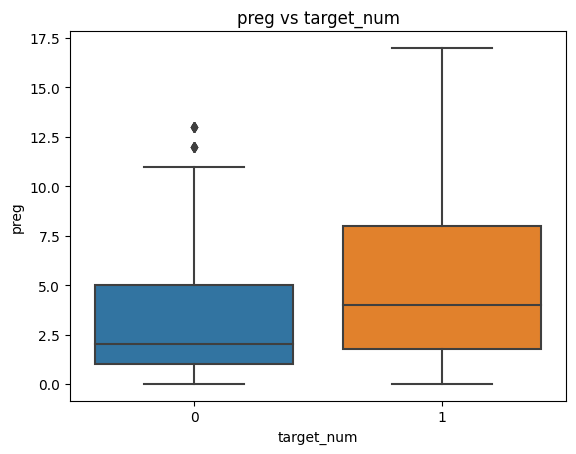

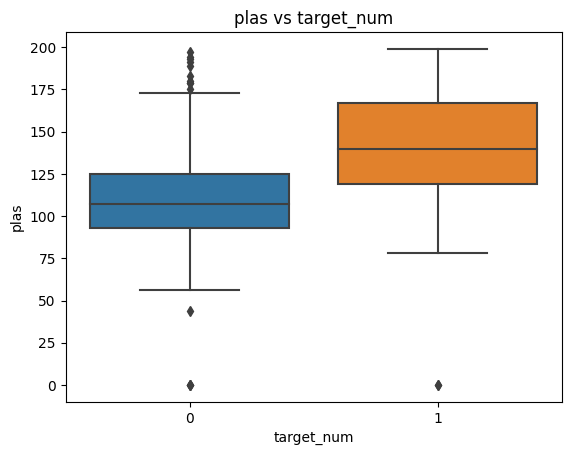

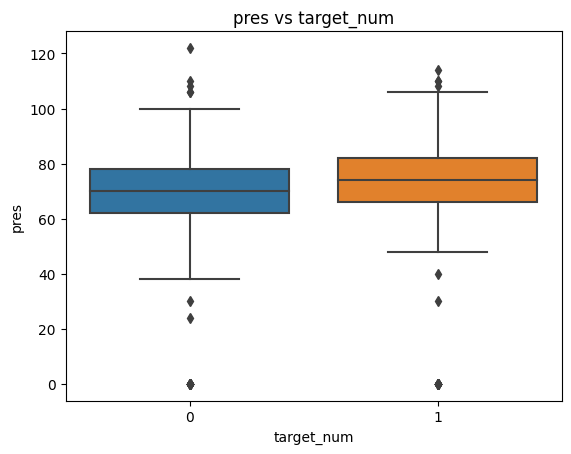

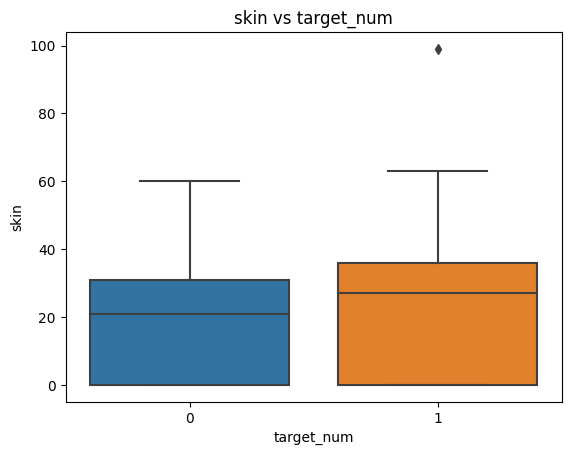

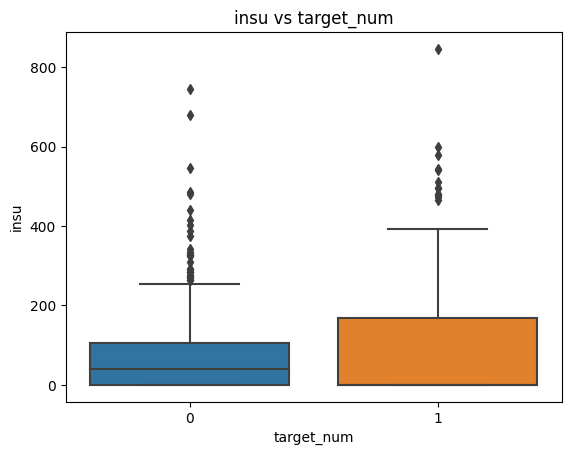

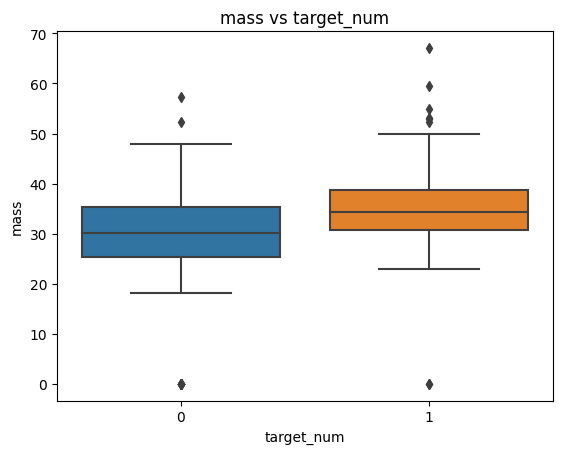

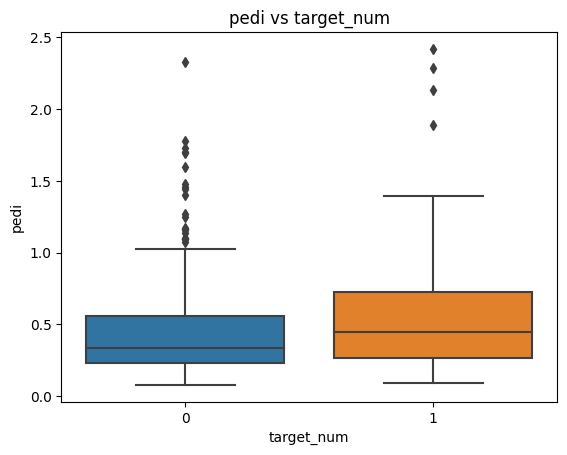

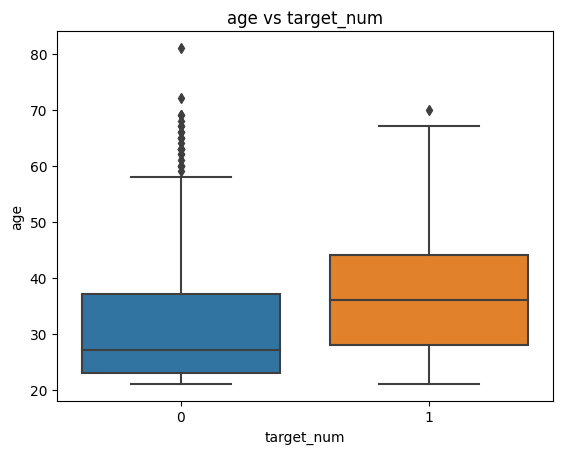

In [143]:
for i in df.columns[:-1]:
    sns.boxplot(data=df,x='target_num',y=i)
    plt.title(i + " vs target_num")
    plt.show()

### Here i want to find out the differences in accuracies when we take different number of features

In [144]:
X = df.drop('target_num', axis=1)
y = df['target_num']

# X is your feature matrix and y is your target vector
model = LinearRegression()
rfe = RFE(estimator=model,n_features_to_select=1) # Select the top 1 feature
rfe.fit(X, y)
print("Selected feature: ", X.columns[rfe.support_])

Selected feature:  Index(['pedi'], dtype='object')


In [155]:
# split data into features and target
X = df[['pedi']]
y = df['target_num']

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# initialize scaler and scale features
scaler = StandardScaler() ## normalize the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# initialize SVM model
svm_model1 = SVC(kernel='linear')

svm_model1.fit(X_train_scaled, y_train,)

# make predictions on test set
y_pred = svm_model1.predict(X_test_scaled)

# evaluate model performance on test set
accuracy = svm_model1.score(X_test_scaled, y_test)
precision = precision_score(y_test, y_pred)

print("The accuracy of the model with one feature is :- ",accuracy)
print("The precision of the model with one feature is :-",precision)

The accuracy of the model with one feature is :-  0.6428571428571429
The precision of the model with one feature is :- 0.0


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [146]:
X = df.drop('target_num', axis=1)
y = df['target_num']

# X is your feature matrix and y is your target vector
model = LinearRegression()
rfe = RFE(estimator=model,n_features_to_select=2) # Select the top 2 feature
rfe.fit(X, y)
print("Selected feature: ", X.columns[rfe.support_])

Selected feature:  Index(['preg', 'pedi'], dtype='object')


In [147]:
# split data into features and target
X = df[['preg','pedi']]
y = df['target_num']

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# initialize scaler and scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# initialize SVM model
svm_model2 = SVC(kernel='linear')

svm_model2.fit(X_train_scaled, y_train,)

# make predictions on test set
y_pred = svm_model2.predict(X_test_scaled)

# evaluate model performance on test set
accuracy = svm_model2.score(X_test_scaled, y_test)
precision = precision_score(y_test, y_pred)

print("The accuracy of the model with two feature is :- ",accuracy)
print("The precision of the model with two feature is :-",precision)

The accuracy of the model with two feature is :-  0.6428571428571429
The precision of the model with two feature is :- 0.0


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [148]:
X = df.drop('target_num', axis=1)
y = df['target_num']

# X is your feature matrix and y is your target vector
model = LinearRegression()
rfe = RFE(estimator=model,n_features_to_select=3) # Select the top 3 feature
rfe.fit(X, y)
print("Selected feature: ", X.columns[rfe.support_])

Selected feature:  Index(['preg', 'mass', 'pedi'], dtype='object')


In [149]:
# split data into features and target
X = df[['preg', 'mass', 'pedi']]
y = df['target_num']

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# initialize scaler and scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# initialize SVM model
svm_model3 = SVC(kernel='linear')

svm_model3.fit(X_train_scaled, y_train,)

# make predictions on test set
y_pred = svm_model3.predict(X_test_scaled)

# evaluate model performance on test set
accuracy = svm_model3.score(X_test_scaled, y_test)
precision = precision_score(y_test, y_pred)

print("The accuracy of the model with three feature is :- ",accuracy)
print("The precision of the model with three feature is :-",precision)

The accuracy of the model with three feature is :-  0.7012987012987013
The precision of the model with three feature is :- 0.68


In [150]:
X = df.drop('target_num', axis=1)
y = df['target_num']

# X is your feature matrix and y is your target vector
model = LinearRegression()
rfe = RFE(estimator=model,n_features_to_select=4) # Select the top 4 feature
rfe.fit(X, y)
print("Selected feature: ", X.columns[rfe.support_])

Selected feature:  Index(['preg', 'plas', 'mass', 'pedi'], dtype='object')


In [151]:
# split data into features and target
X = df[['preg', 'plas', 'mass', 'pedi']]
y = df['target_num']

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# initialize scaler and scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# initialize SVM model
svm_model4 = SVC(kernel='linear')

svm_model4.fit(X_train_scaled, y_train,)

# make predictions on test set
y_pred = svm_model4.predict(X_test_scaled)

# evaluate model performance on test set
accuracy = svm_model4.score(X_test_scaled, y_test)
precision = precision_score(y_test, y_pred)

print("The accuracy of the model with four feature is :- ",accuracy)
print("The precision of the model with four feature is :-",precision)

The accuracy of the model with four feature is :-  0.7727272727272727
The precision of the model with four feature is :- 0.7083333333333334


In [152]:
X = df.drop('target_num', axis=1)
y = df['target_num']

# X is your feature matrix and y is your target vector
model = LinearRegression()
rfe = RFE(estimator=model,n_features_to_select=5) # Select the top 5 feature
rfe.fit(X, y)
print("Selected feature: ", X.columns[rfe.support_])

Selected feature:  Index(['preg', 'plas', 'mass', 'pedi', 'age'], dtype='object')


In [158]:
# split data into features and target
X = df[['preg', 'plas', 'mass', 'pedi', 'age']]
y = df['target_num']

# split data into training and testing sets
X_train, X_test, y_train, y_test5 = train_test_split(X, y, test_size=0.2, random_state=42)

# initialize scaler and scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# initialize SVM model
svm_model5 = SVC(kernel='linear')

svm_model5.fit(X_train_scaled, y_train,)

# make predictions on test set
y_pred5 = svm_model5.predict(X_test_scaled)

# evaluate model performance on test set
accuracy = svm_model5.score(X_test_scaled, y_test5)
precision = precision_score(y_test5, y_pred5)

print("The accuracy of the model with 5 feature is :- ",accuracy)
print("The precision of the model with 5 feature is :-",precision)

The accuracy of the model with 5 feature is :-  0.7792207792207793
The precision of the model with 5 feature is :- 0.7142857142857143


In [159]:
# split data into features and target
X = df.drop('target_num',axis=1)
y = df['target_num']

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# initialize scaler and scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# initialize SVM model
svm_model_all = SVC(kernel='linear')

svm_model_all.fit(X_train_scaled, y_train,)

# make predictions on test set
y_pred = svm_model_all.predict(X_test_scaled)

# evaluate model performance on test set
accuracy = svm_model_all.score(X_test_scaled, y_test)
precision = precision_score(y_test, y_pred)

print("The accuracy of the model with all feature is :- ",accuracy)
print("The precision of the model with all feature is :-",precision)

The accuracy of the model with all feature is :-  0.7597402597402597
The precision of the model with all feature is :- 0.6666666666666666


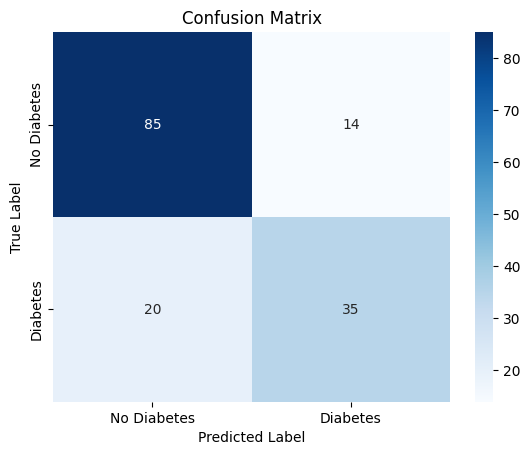

In [160]:
from sklearn.metrics import confusion_matrix
# Obtain the confusion matrix
cm = confusion_matrix(y_test5, y_pred5)

# Define the labels for the confusion matrix
labels = ['No Diabetes', 'Diabetes']

# Create a heatmap visualization of the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)

# Set the axis labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Display the plot
plt.show()